In [1100]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os

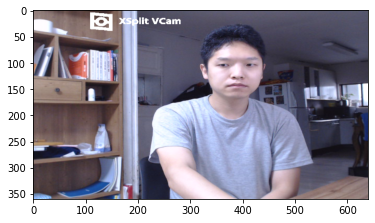

In [1101]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img_skc1.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_rgb)
plt.show()

In [1102]:

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언


In [1103]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)


rectangles[[(330, 80) (438, 187)]]


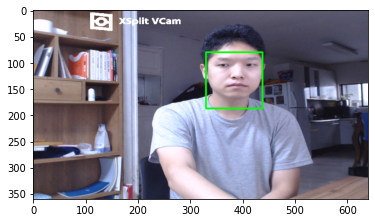

In [1104]:
print(dlib_rects)   # 찾은 얼굴 영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [1105]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [1106]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks))

1


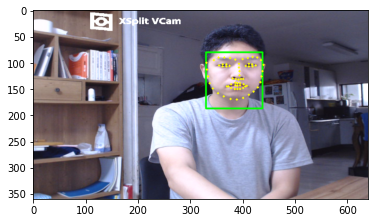

In [1107]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [1108]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[27][1] 
#     - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(394, 124)
(x,y) : (394,102)
(w,h) : (109,108)


고양이 수염 갖고와서 변형


(54, 109, 3)


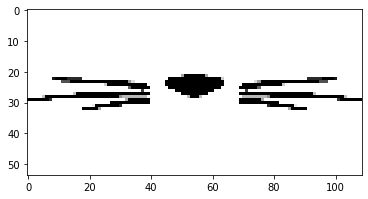

In [1109]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,int(h/2)))
# img_sticker[img_sticker[:]==0]=2
# img_sticker[img_sticker[:]==255]=0


print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [1110]:
refined_x = x - w // 2  # left
refined_y = y # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (340,102)


In [1111]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(54, 109, 3)


In [1112]:
# refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print(img_sticker.shape[0])

(x,y) : (340,102)
54


In [1113]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

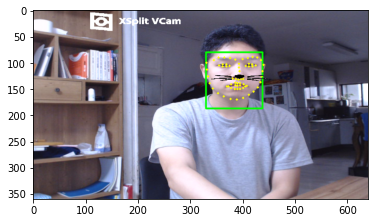

In [1114]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

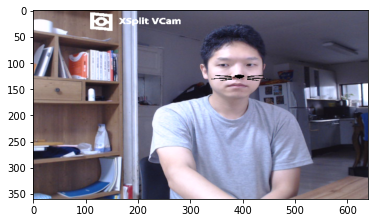

In [1115]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 최종 회고
---
이번에는 익스를 충분한 시간을 두고 하지 못 하여 과제가 많이 막혔습니다.\
이미지 투명화를 하는 부분과 세로축 이동이 이루어지지 않아서 그 원인을 찾다보니 그만 급히 마무리를 하게 됬습니다.\
다음에는 조금 여유있게 익스를 마무리 하는 것이 좋을 듯 싶습니다...\
